### Employee Attrition

### This problem appeared in Analytics vidhya Job-A-Thon November 2021 event

### Problem Statement

#### To aid staffing, you are provided with the monthly information for a segment of employees for 2016 and 2017 and tasked to predict whether a current employee will be leaving the organization in the upcoming two quarters (01 Jan 2018 - 01 July 2018) or not.


In [1]:
## importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
## reading the training data and storing it in data frame df
df=pd.read_csv("train_MpHjUjU.csv")

In [3]:
df

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2


In [4]:
## creating a new variable A as copy of variable LastWorkingDate

df['A']=df['LastWorkingDate']
df

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,A
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,NaN
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,NaN
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,2016-03-11
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,NaN
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3,NaN
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3,NaN
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2,NaN
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2,NaN


In [5]:
## replacing nan values in A variable with last date of the data segment given that is 2017-12-31

df['A'] = df['A'].replace(np.nan, '2017-12-31')

In [6]:
df

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,A
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,2017-12-31
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,2017-12-31
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,2016-03-11
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,2017-12-31
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,2017-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3,2017-12-31
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3,2017-12-31
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2,2017-12-31
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2,2017-12-31


In [7]:
##create a new column vintage in days

import datetime   ## import library datetime
df[['A','Dateofjoining']] = df[['A','Dateofjoining']].apply(pd.to_datetime) #if conversion required
df['Vintage in Days'] = (df['A'] - df['Dateofjoining']).dt.days

In [8]:
df

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,A,Vintage in Days
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,2017-12-31,738
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,2017-12-31,738
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,2016-03-11,78
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,2017-12-31,55
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,2017-12-31,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3,2017-12-31,206
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3,2017-12-31,206
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2,2017-12-31,206
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2,2017-12-31,206


In [9]:
## create a new column new and change the values in new column to True and False

df['new']=np.where(df['A']!='2017-12-31',True,False)
df

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,A,Vintage in Days,new
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,2017-12-31,738,False
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,2017-12-31,738,False
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,2016-03-11,78,True
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,2017-12-31,55,False
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,2017-12-31,55,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3,2017-12-31,206,False
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3,2017-12-31,206,False
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2,2017-12-31,206,False
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2,2017-12-31,206,False


In [10]:
## changing the values in new column from true false to 1 and 0 

df['new']=df[['new']].astype(float)

In [11]:
df

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,A,Vintage in Days,new
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,2017-12-31,738,0.0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,2017-12-31,738,0.0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,2016-03-11,78,1.0
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,2017-12-31,55,0.0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,2017-12-31,55,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3,2017-12-31,206,0.0
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3,2017-12-31,206,0.0
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2,2017-12-31,206,0.0
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2,2017-12-31,206,0.0


In [12]:
## drop column A

df = df.drop(columns='A', axis=1)

In [13]:
df

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Vintage in Days,new
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,738,0.0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,738,0.0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,78,1.0
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,55,0.0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,55,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3,206,0.0
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3,206,0.0
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2,206,0.0
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2,206,0.0


In [14]:
## renaming new column in dataframe to Target column which will be our label for the analysis

df.rename(columns = {'new':'Target'}, inplace = True)

In [15]:
df

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Vintage in Days,Target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,738,0.0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,738,0.0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,78,1.0
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,55,0.0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,55,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3,206,0.0
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3,206,0.0
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2,206,0.0
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2,206,0.0


In [16]:
### Reading the test data and storing it in dataframe test

test = pd.read_csv("test_hXY9mYw.csv")
test

,Emp_ID
0,394
1,173
2,1090
3,840
4,308
...,...
736,2134
737,2255
738,448
739,1644


In [17]:
## check the info of test dataframe

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Emp_ID  741 non-null    int64
dtypes: int64(1)
memory usage: 5.9 KB


In [18]:
### check the duplicate values in test dataframe
duplicates = test.duplicated()
duplicates.sum()

0

In [19]:
### check null values in test dataframe
test.isnull().sum()

Emp_ID    0
dtype: int64

#### Here we observe that test dataframe has 741 observation with no null and duplicate values and only one column Emp_ID

In [20]:
### create new dataframe test_new by performing inner join with common element Emp_ID

test_new= pd.merge(test,df,how='inner',on='Emp_ID')
test_new

,Emp_ID,MMM-YY,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Vintage in Days,Target
0,394,2016-01-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,189360,1,2400,0.0
1,394,2016-02-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,390810,1,2400,0.0
2,394,2016-03-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,1846360,1,2400,0.0
3,394,2016-04-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,194010,2,2400,0.0
4,394,2016-05-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,371160,2,2400,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,624,2017-08-01,35,Male,C15,Bachelor,104712,2011-05-18,NaN,2,3,412080,2,2419,0.0
8584,624,2017-09-01,35,Male,C15,Bachelor,104712,2011-05-18,NaN,2,3,154590,2,2419,0.0
8585,624,2017-10-01,35,Male,C15,Bachelor,104712,2011-05-18,NaN,2,3,941470,2,2419,0.0
8586,624,2017-11-01,35,Male,C15,Bachelor,104712,2011-05-18,NaN,2,3,288330,2,2419,0.0


In [21]:
## Drop the duplicate rows of dataframe test_new

test_new= test_new.drop_duplicates(subset = ["Emp_ID"])

In [22]:
test_new

,Emp_ID,MMM-YY,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Vintage in Days,Target
0,394,2016-01-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,189360,1,2400,0.0
24,173,2016-01-01,37,Male,C28,College,56174,2011-06-13,NaN,1,3,1295750,2,2393,0.0
48,1090,2016-01-01,37,Male,C13,College,96750,2011-06-27,NaN,2,4,1382660,3,2379,0.0
72,840,2016-01-01,39,Female,C8,College,88813,2011-07-11,NaN,1,4,391050,1,2365,0.0
96,308,2016-01-01,30,Male,C5,Master,188418,2011-08-15,NaN,2,5,1507300,3,2330,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8468,2134,2016-01-01,38,Male,C29,College,116006,2010-10-30,NaN,2,5,3198430,4,2619,0.0
8492,2255,2016-01-01,38,Male,C25,College,133489,2010-11-06,NaN,3,4,1005280,2,2612,0.0
8516,448,2016-01-01,35,Male,C10,Bachelor,65389,2011-04-04,NaN,2,4,3011170,3,2463,0.0
8540,1644,2016-01-01,46,Female,C9,Bachelor,105513,2011-04-28,NaN,2,4,1051620,2,2439,0.0


In [23]:
## removing unnecessary columns from the data frame test_new
cols= ['MMM-YY','Emp_ID','City','Dateofjoining','LastWorkingDate','Target']
test_new = test_new.drop(columns=cols, axis=1)


In [24]:
test_new

,Age,Gender,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Vintage in Days
0,32,Female,Master,97722,2,4,189360,1,2400
24,37,Male,College,56174,1,3,1295750,2,2393
48,37,Male,College,96750,2,4,1382660,3,2379
72,39,Female,College,88813,1,4,391050,1,2365
96,30,Male,Master,188418,2,5,1507300,3,2330
...,...,...,...,...,...,...,...,...,...
8468,38,Male,College,116006,2,5,3198430,4,2619
8492,38,Male,College,133489,3,4,1005280,2,2612
8516,35,Male,Bachelor,65389,2,4,3011170,3,2463
8540,46,Female,Bachelor,105513,2,4,1051620,2,2439


In [25]:
## check the info of test_new dataframe

test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 0 to 8564
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   741 non-null    int64 
 1   Gender                741 non-null    object
 2   Education_Level       741 non-null    object
 3   Salary                741 non-null    int64 
 4   Joining Designation   741 non-null    int64 
 5   Designation           741 non-null    int64 
 6   Total Business Value  741 non-null    int64 
 7   Quarterly Rating      741 non-null    int64 
 8   Vintage in Days       741 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 57.9+ KB


In [26]:
### check null values in test_new dataframe
test_new.isnull().sum()

Age                     0
Gender                  0
Education_Level         0
Salary                  0
Joining Designation     0
Designation             0
Total Business Value    0
Quarterly Rating        0
Vintage in Days         0
dtype: int64

In [27]:
### check the duplicate values in test dataframe

duplicates = test_new.duplicated()
duplicates.sum()

0

In [28]:
test_new

,Age,Gender,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Vintage in Days
0,32,Female,Master,97722,2,4,189360,1,2400
24,37,Male,College,56174,1,3,1295750,2,2393
48,37,Male,College,96750,2,4,1382660,3,2379
72,39,Female,College,88813,1,4,391050,1,2365
96,30,Male,Master,188418,2,5,1507300,3,2330
...,...,...,...,...,...,...,...,...,...
8468,38,Male,College,116006,2,5,3198430,4,2619
8492,38,Male,College,133489,3,4,1005280,2,2612
8516,35,Male,Bachelor,65389,2,4,3011170,3,2463
8540,46,Female,Bachelor,105513,2,4,1051620,2,2439


#### Here we observe that test_new dataframe has 741 observation with no null and duplicate values and 9 features out of which 7 are numerical and 2 are categorical

In [29]:
## removing unnecessary columns from the training data frame df
cols= ['MMM-YY','Emp_ID','City','Dateofjoining','LastWorkingDate']
df = df.drop(columns=cols, axis=1)


In [30]:
df

,Age,Gender,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Vintage in Days,Target
0,28,Male,Master,57387,1,1,2381060,2,738,0.0
1,28,Male,Master,57387,1,1,-665480,2,738,0.0
2,28,Male,Master,57387,1,1,0,2,78,1.0
3,31,Male,Master,67016,2,2,0,1,55,0.0
4,31,Male,Master,67016,2,2,0,1,55,0.0
...,...,...,...,...,...,...,...,...,...,...
19099,30,Male,Master,70254,2,2,740280,3,206,0.0
19100,30,Male,Master,70254,2,2,448370,3,206,0.0
19101,30,Male,Master,70254,2,2,0,2,206,0.0
19102,30,Male,Master,70254,2,2,200420,2,206,0.0


In [31]:
## lets check the information of the datadrame df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   19104 non-null  int64  
 1   Gender                19104 non-null  object 
 2   Education_Level       19104 non-null  object 
 3   Salary                19104 non-null  int64  
 4   Joining Designation   19104 non-null  int64  
 5   Designation           19104 non-null  int64  
 6   Total Business Value  19104 non-null  int64  
 7   Quarterly Rating      19104 non-null  int64  
 8   Vintage in Days       19104 non-null  int64  
 9   Target                19104 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 1.5+ MB


#### Here we have 2 categorical variables and 8  numerical variables out of which Target variable is our label and rest are features

In [32]:
## lets check the statistics
df.describe()

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Vintage in Days,Target
count,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000,19104.000000,19104.000000
mean,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899,945.074958,0.084590
std,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832,709.276001,0.278277
min,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000,0.000000,0.000000
25%,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000,389.000000,0.000000
50%,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000,815.500000,0.000000
75%,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000,1476.000000,0.000000
max,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000,2831.000000,1.000000


In [33]:
## lets check the null vlues
df.isnull().sum()

Age                     0
Gender                  0
Education_Level         0
Salary                  0
Joining Designation     0
Designation             0
Total Business Value    0
Quarterly Rating        0
Vintage in Days         0
Target                  0
dtype: int64

#### There are no null values in the dataset

In [34]:
## check for duplicate values
duplicates = df.duplicated()
duplicates.sum()

2409

#### There are 2409 duplicate values in the dataframe

In [35]:
## dropping the duplicate values

df.drop_duplicates(keep=False,inplace=True)

In [36]:
## check for duplicate values
duplicates = df.duplicated()
duplicates.sum()

0

#### Now we have no duplicate values in the dataframe

In [37]:
df

,Age,Gender,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Vintage in Days,Target
0,28,Male,Master,57387,1,1,2381060,2,738,0.0
1,28,Male,Master,57387,1,1,-665480,2,738,0.0
2,28,Male,Master,57387,1,1,0,2,78,1.0
8,43,Male,Master,65603,2,2,350000,1,389,0.0
9,43,Male,Master,65603,2,2,0,1,141,1.0
...,...,...,...,...,...,...,...,...,...,...
19099,30,Male,Master,70254,2,2,740280,3,206,0.0
19100,30,Male,Master,70254,2,2,448370,3,206,0.0
19101,30,Male,Master,70254,2,2,0,2,206,0.0
19102,30,Male,Master,70254,2,2,200420,2,206,0.0


In [38]:
## lets check the information of the datadrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15279 entries, 0 to 19103
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   15279 non-null  int64  
 1   Gender                15279 non-null  object 
 2   Education_Level       15279 non-null  object 
 3   Salary                15279 non-null  int64  
 4   Joining Designation   15279 non-null  int64  
 5   Designation           15279 non-null  int64  
 6   Total Business Value  15279 non-null  int64  
 7   Quarterly Rating      15279 non-null  int64  
 8   Vintage in Days       15279 non-null  int64  
 9   Target                15279 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 1.3+ MB


#### After removing the duplicate values we have 15279 observations in which 2 are categorical variables and 8 are numerical variables out of which Target variable is our label and rest are features

In [39]:
## lets check the statistics
df.describe()

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Vintage in Days,Target
count,15279.000000,15279.000000,15279.000000,15279.000000,1.527900e+04,15279.000000,15279.000000,15279.000000
mean,35.077165,66623.932587,1.597421,2.262124,7.107094e+05,2.222920,1039.546502,0.105766
std,6.392484,31044.596872,0.782831,1.037117,1.221519e+06,0.996812,716.473901,0.307548
min,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000,0.000000,0.000000
25%,30.000000,43252.000000,1.000000,1.000000,1.406800e+05,1.000000,428.000000,0.000000
50%,35.000000,61247.000000,1.000000,2.000000,3.935100e+05,2.000000,902.000000,0.000000
75%,39.000000,85254.000000,2.000000,3.000000,8.509050e+05,3.000000,1705.000000,0.000000
max,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000,2831.000000,1.000000


### EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

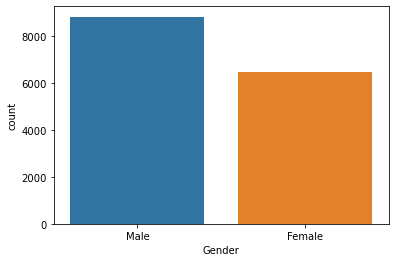

In [40]:
# categorical attributes visualization
sns.countplot(df['Gender'])

#### Here we can observe that more male employees are present in the organisation

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

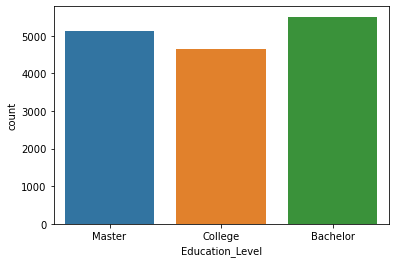

In [41]:
sns.countplot(df['Education_Level'])

#### Here we can observe that maximum employees have Bachelor then Master and then college as their level of education

<AxesSubplot:xlabel='Target', ylabel='count'>

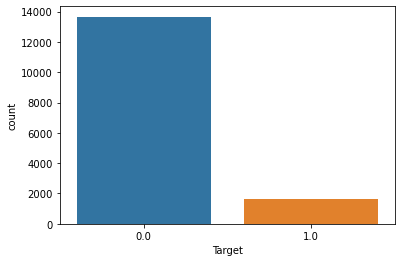

In [42]:
### Lets check the label
sns.countplot(df['Target'])

In [43]:
df['Target'].value_counts()

0.0    13663
1.0     1616
Name: Target, dtype: int64

#### Here we can see it clearly that employees which will not leave the company are 13663 and employees which will leave are 1616 which is a clear case of Imbalanced classification

<AxesSubplot:xlabel='Salary', ylabel='Density'>

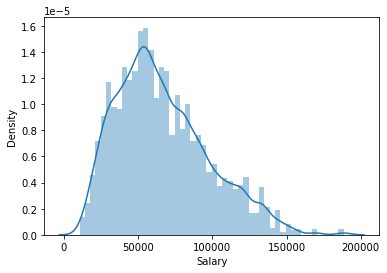

In [44]:
# numerical attributes visualization
sns.distplot(df["Salary"])

<AxesSubplot:xlabel='Joining Designation', ylabel='Density'>

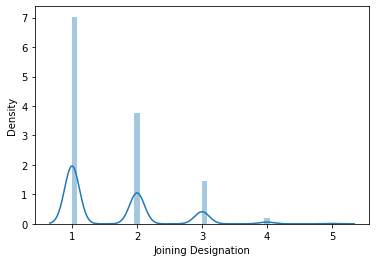

In [45]:
sns.distplot(df["Joining Designation"])

<AxesSubplot:xlabel='Designation', ylabel='Density'>

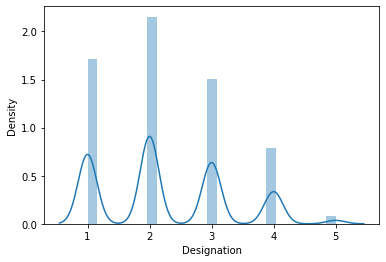

In [46]:
sns.distplot(df["Designation"])

<AxesSubplot:xlabel='Total Business Value', ylabel='Density'>

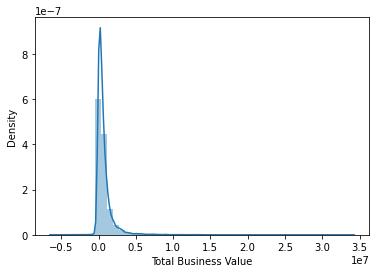

In [47]:
sns.distplot(df["Total Business Value"])

<AxesSubplot:xlabel='Quarterly Rating', ylabel='Density'>

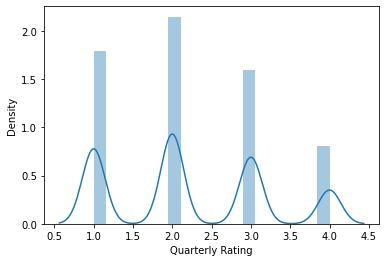

In [48]:
sns.distplot(df["Quarterly Rating"])

<AxesSubplot:xlabel='Vintage in Days', ylabel='Density'>

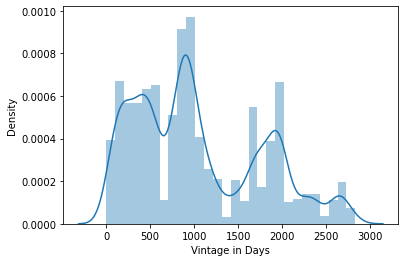

In [49]:
sns.distplot(df["Vintage in Days"])

#### Correlation heatmap

<AxesSubplot:>

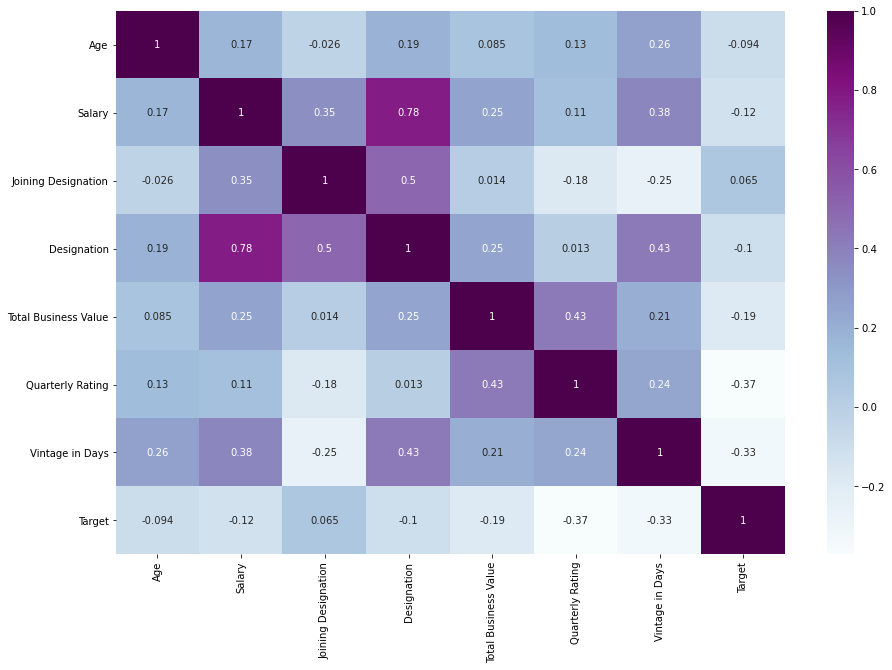

In [50]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

#### Change categorical variable to numerical by using Label encoder

In [51]:
## change the categorical variables to numerical using label encoder in training dataframe df

from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Education_Level']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [52]:
df.head()

,Age,Gender,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Vintage in Days,Target
0,28,1,2,57387,1,1,2381060,2,738,0.0
1,28,1,2,57387,1,1,-665480,2,738,0.0
2,28,1,2,57387,1,1,0,2,78,1.0
8,43,1,2,65603,2,2,350000,1,389,0.0
9,43,1,2,65603,2,2,0,1,141,1.0


In [53]:
## change the categorical variables to numerical using label encoder in test dataframe test_new

cols = ['Gender','Education_Level']
le = LabelEncoder()
for col in cols:
    test_new[col] = le.fit_transform(test_new[col])

In [54]:
test_new.head()

,Age,Gender,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Vintage in Days
0,32,0,2,97722,2,4,189360,1,2400
24,37,1,1,56174,1,3,1295750,2,2393
48,37,1,1,96750,2,4,1382660,3,2379
72,39,0,1,88813,1,4,391050,1,2365
96,30,1,2,188418,2,5,1507300,3,2330


#### Splitting the data to features and label

In [55]:
X = df.drop(columns=['Target'], axis=1)
y = df['Target']

#### Scaling of features using standard scaler

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaler = sc.fit_transform(X)

In [57]:
X_scaler[-1]

array([-0.79426566,  0.8565564 ,  1.22981529,  0.11693456,  0.51427666,
       -0.25275171, -0.24497304, -0.22364068, -1.16343914])

#### Split the training dataframe df into train and validation keeping validation set as 20%

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
X_train,X_valid,y_train,y_valid = train_test_split(X_scaler,y,test_size=0.2,random_state=42, stratify=y)

#### Imbalanced class

<AxesSubplot:xlabel='Target', ylabel='count'>

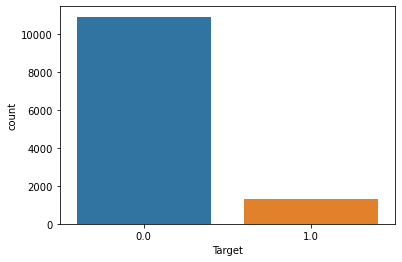

In [59]:
sns.countplot(y_train)

#### To solve the problem of imbalanced class we will be using oversampling technique SMOTE  as imbalanced class can lead to accuracy paradox

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
over_sample = SMOTE()
X_smote, y_smote = over_sample.fit_resample(X_train, y_train)

<AxesSubplot:xlabel='Target', ylabel='count'>

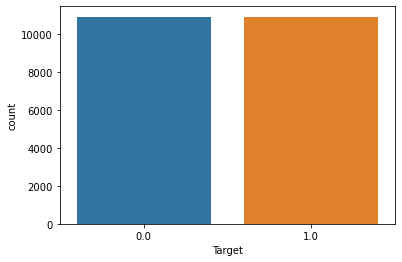

In [62]:
sns.countplot(y_smote)

#### We have balanced our label by using SMOTE

#### Logistic Regression model

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(X_smote, y_smote)
# testing
y_pred = model.predict(X_valid)
print(classification_report(y_valid, y_pred))
print("F1 Score:",f1_score(y_valid, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91      2733
         1.0       0.40      0.91      0.56       323

    accuracy                           0.85      3056
   macro avg       0.69      0.87      0.73      3056
weighted avg       0.93      0.85      0.87      3056

F1 Score: 0.557345971563981


#### Random Forest classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(X_smote, y_smote)
# testing
y_pred = model.predict(X_valid)
print(classification_report(y_valid, y_pred))
print("F1 Score:",f1_score(y_valid, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      2733
         1.0       0.71      0.80      0.75       323

    accuracy                           0.94      3056
   macro avg       0.84      0.88      0.86      3056
weighted avg       0.95      0.94      0.95      3056

F1 Score: 0.7532846715328467


#### XGBoost classifier

In [65]:
from xgboost import XGBClassifier
model = XGBClassifier()
# training
model.fit(X_smote, y_smote)
# testing
y_pred = model.predict(X_valid)
print(classification_report(y_valid, y_pred))
print("F1 Score:",f1_score(y_valid, y_pred))

[22:08:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      2733
         1.0       0.78      0.80      0.79       323

    accuracy                           0.95      3056
   macro avg       0.88      0.88      0.88      3056
weighted avg       0.96      0.95      0.96      3056

F1 Score: 0.7883435582822085


In [66]:
submission = pd.read_csv('sample_submission_znWiLZ4.csv')
from xgboost import XGBClassifier
model = XGBClassifier()
# training
model.fit(X_smote, y_smote)

final_predictions = model.predict(test_new)
submission['Target'] = final_predictions


[22:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [67]:
submission.to_csv('my_submission.csv', index=False)